In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:
1. Data Exploration and Understanding:



• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset. 
3. List all the columns and their data types.


In [2]:
wlr = pd.read_csv("WorldHappinessResult.csv")
wlr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [10]:
row,col = wlr.shape
print(f"Total number of rows: {row}")
print(f"Total number of columns: {col}")

Total number of rows: 143
Total number of columns: 9


In [16]:
wlr.dtypes

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.


In [21]:
wlr_mean = wlr['score'].mean()
wlr_median = wlr['score'].median()
wlr_standard_deviation = wlr['score'].std()
print(f"Mean of score is: {wlr_mean}")
print(f"Median of score is: {wlr_median}")
print(f"Standard Deviation of score is: {wlr_standard_deviation}")


Mean of score is: 5.52758041958042
Median of score is: 5.785
Standard Deviation of score is: 1.1707165099442993


In [25]:
country_wlrmin = wlr.loc[wlr['score'].idxmin(),'Country name']
country_wlrmax = wlr.loc[wlr['score'].idxmax(),'Country name']
print(f"Country with minimum happiness score is: {country_wlrmin}")
print(f"Country with maximum happiness score is: {country_wlrmax}")

Country with minimum happiness score is: Afghanistan
Country with maximum happiness score is: Finland



• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [31]:
wlr.isnull().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [35]:
greater_score_country_name = wlr[wlr['score'] >7.5]['Country name']
print(f"Country woth score greater than 7.5 are:\n{greater_score_country_name}")

Country woth score greater than 7.5 are:
0    Finland
1    Denmark
2    Iceland
Name: Country name, dtype: object


In [38]:
filtered_dataset = wlr.sort_values(by = 'Log GDP per capita',ascending=False)
filtered_dataset.head(10)
#reset index later

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
Low − (Score < 4) Medium − (4 ≤ Score ≤ 6) High − (Score > 6)

In [4]:
conditions = [
  wlr["score"] < 4,
  (wlr["score"] >= 4) & (wlr["score"] <= 6),
  wlr["score"] > 6
]
choices = ["Low","Medium","High"]
wlr["Happiness_Category"] = np.select(conditions, choices)
print(wlr[["Country name","score","Happiness_Category"]])

         Country name  score Happiness_Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]



2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

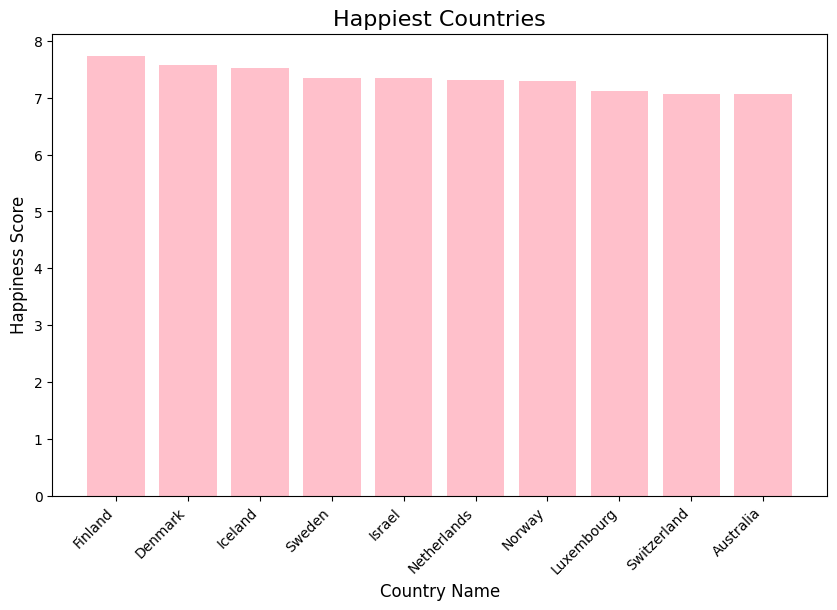

In [23]:
happiest_countries = wlr.sort_values(by = 'score',ascending=False)
x_values = happiest_countries['Country name'].head(10)
y_values = happiest_countries['score'].head(10)
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='pink')
plt.title('Happiest Countries', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.show()

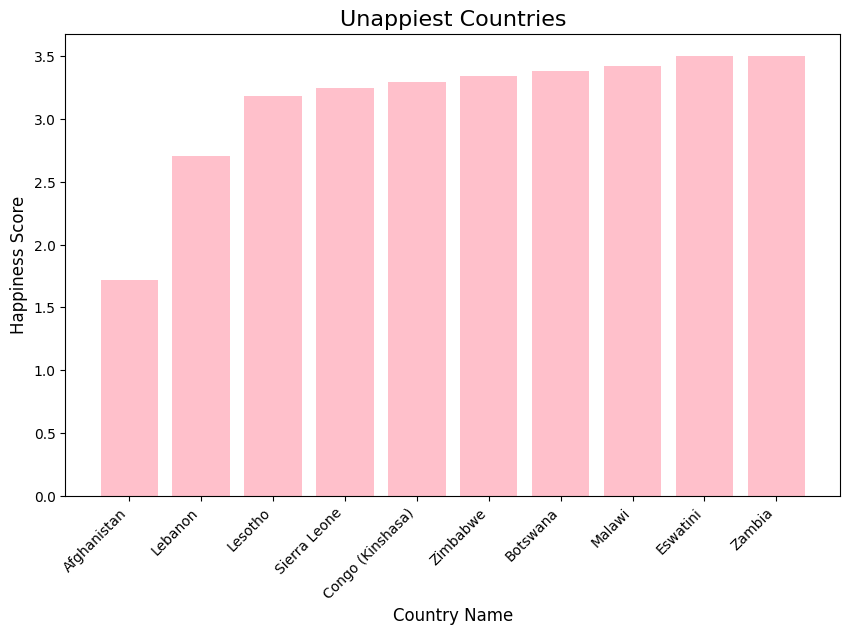

In [32]:
unhappiest_countries = wlr.sort_values(by = 'score',ascending=True)
x_values = unhappiest_countries['Country name'].head(10)
y_values = unhappiest_countries['score'].head(10)
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.line(x_values, y_values, color='pink')
plt.title('Unappiest Countries', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.show()